- Regresion lineal - aquesta es recta (2d) o pla (3d)
- Regresion polinomica - aquesta es deforma amb corves (2d) o amb superficien en l'espai tridimensional (3d)

### Polynomial regression

***Polynomial regression*** models the relationship between a dependent variable $y$ and one o more independent variables $X$, assuming possible non-linear relationships between the independent variables and the dependent variable.

The mathematica expression of a polynomial regression can be represented as:

 $y = \beta_{0} + \\
 \beta_{1}\,x_1 + \beta_{11}\,x_1\,x_1 + \beta_{12}\,x_1\,x_2 + \dots + \beta_{111}\,x_1\,x_1\,x_1 + \dots +\\
 \beta_{2}\,x_2 + \beta_{22}\,x_2\,x_2 + \beta_{23}\,x_2\,x_3 + \dots + \beta_{222}\,x_2\,x_2\,x_2 + \dots +\\
 \dots \\
 \beta_{m}\,x_m + \beta_{mm}\,x_m\,x_m + \beta_{mmm}\,x_m\,x_m\,x_m + \dots$

where we can have many different terms with any possible combination of features.

The goal of polynomial regression is to estimate the values of the coefficients $\beta_{...}$ that minimize the sum of squared differences between the observed and predicted values of 𝑦. This is a two step approach:

- generate the ***polynomial features***
- apply multivariate linear regression on the collection of polynomial features

The fitted line is a ***curve*** (not a straight line) and represents the best estimate of the relationship between the independent and dependent variables based on the given data.

Si posem masses variables, podem fer un model amb ober fitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### polynomial features
- create new features that result from the combination of the original features up to a given degree

#### Aquesta funció crea la simplificació dels exponents

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
pf = PolynomialFeatures(degree = 2)
pf.fit(X)

PolynomialFeatures()

Els de la esquerre són iguals, els següents ja són els quadrats, cubs, etc. 

In [5]:
# Posarà les mateixes columnes i després la primera per les altres
# La primera columna són les betes (el camp independent)

# Si es fa amb la pipeline s'ha de posar algo perquè no posi els 1 a davant, hi ha algun exemple que surt: include_bias = False
pf.transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  11.,  81.,  90.,  99., 100., 110., 121.]])

### scikit-learn pipeline

- a ***pipeline*** is an object with a sequence of steps to process the data
- in our case we create a pipeline to generate the polynomial features and perform a linear regression on them
- Encadenar vàries eines per transformar les dades, ajustar models, etc. 

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [7]:
pipeline = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
pipeline

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

#### Trucu:
Estimació de polinomi de exponents de grau n a grau 1. El considerem lineal. 

### example: sèrie climàtica Girona 1950/2022

In [8]:
df = pd.read_csv('../Dades/girona/girona_raw.txt', delimiter = '\t')
df.head()

,ANY,MES,DIA,PPT,TX,TN
0,1950,1,1,0.0,12.7,5.2
1,1950,1,2,0.0,13.2,-2.5
2,1950,1,3,0.0,14.8,-1.8
3,1950,1,4,0.0,15.4,0.5
4,1950,1,5,0.0,15.7,-1.8


In [9]:
# Mirem que no hi hagi nulls etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26663 entries, 0 to 26662
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANY     26663 non-null  int64  
 1   MES     26663 non-null  int64  
 2   DIA     26663 non-null  int64  
 3   PPT     26663 non-null  float64
 4   TX      26663 non-null  float64
 5   TN      26663 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


- a simple plot of the data does not give any clue about any tendency in the data

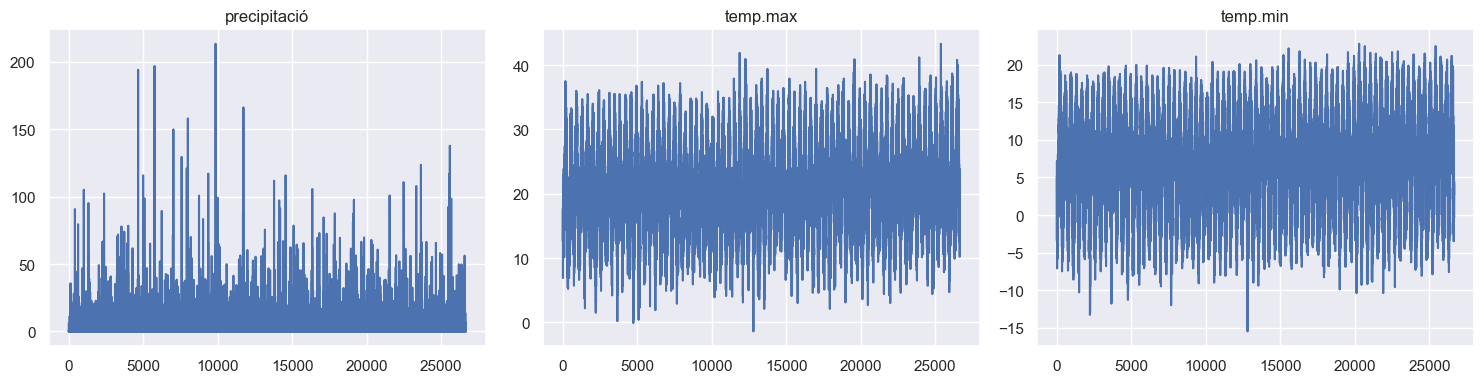

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4), sharex = True)
#
axs[0].set_title('precipitació')
axs[0].plot(df.PPT)
axs[1].set_title('temp.max')
axs[1].plot(df.TX)
axs[2].set_title('temp.min')
axs[2].plot(df.TN)
plt.tight_layout()

- No veiem res, ho hem de compactar.
- Per veure com pot evolucionar. 
- Per veure-ho millor fem la curva de regressió: 

### compute a regression curve

- Això és una regressió linal de una variable dependent (presipitació) respecte una independent (temps).
- Temperatura (és la dependent).
- Perquè volem saber la presipitació donat que passa el temps.
- No predim probabilitats, estem fent regressió, no te a veure amb probabilitats. 
    - La classificació tenim un grup de dades on hi fem classes (classificar el text ham/spam). 
    - La regressió farem inferencia pel valor que pot pendre una variable. 
        - Model de classificació &rarr; dona una classe (hard) i la probabilitat de cada (soft)
        - Model de regressió &rarr; valor numeric.
    - No probabilitat, quantitat de pluja que podem tenir. Podríem fer un model que calcules la probabilitat que plogui. 
        - Dos variables independents i predir-ho.
- Encara que sigui una sola variable, es converteix en x^2 
- Dintre de model de regressió: 
    - Regressió lineal
        - Univariant (y = b0 + b1X)
        - Multivariant (y = b0 + b1x1 + b2x2 + n
    - Regressió polinomica:
        - Univariant: X1, si es de grau 2. es converteix en x1 * x1^2 &rarr; x1 i x2 &rarr; x1^2 és el x2
        - Multivariant: x1 i x2 &rarr; es converteixen en 5. x1 x2 x1^2 x2^2 x1x2 &rarr; x12345
            - Serien muntanyes amb 3d o altres dimensions.
    - Si tenim una sola variable per considerar grau 2, és ella i ella al cuadrat, ja són dues variables &rarr; serà regressió lineal multivariant. 
    - Com més grau &rarr; més multivariant. 
- Grau dos tenim una parabola. 
- Probem grau dos per intuició.
- X^3 una altre funció (no fer-ho servir) **No més gran que 2, perquè genera overfitting** &rarr; **A no ser que tinguem només una variable**
- x^4 quan la dependent creix molt rapid per un petit increment per la independent.
- Ens hem de imaginar la corba per assignar el grau.
<hr />

- considering a $degree=2$ polynomial our model is: $y = \beta_0 + \beta_1\,x + \beta_2\,x^2$
- with a single dpendent variable $X$ that represents time (in days)

<hr/> 

- Volem predir la presipitació serà de 3 l/m2 en funició del dia, mires anys enrrere, mires si la tendencia es manté (es absurd). 
- Mitjes anuals, podem preveure que l'any que ve fara x temperatura mitja. 
- Diferents models per inferir presipitació temp max min

In [11]:
# Observacions a nivell diari. Ho podríem estalviar pq la variable no aporta informació, el que condiciona la y és el 
# pas del temps (no que sigui  28/02/2024)

# Són totes les dates, ho podríem fer amb un index pq no aporten més informació de que van passant els dies. 

# No està bé perquè hi ha el salt de final de mes a principi de mes, per això fem el X
D = (df.ANY *10000 + df.MES *100 + df.DIA).to_numpy()

In [12]:
D

array([19500101, 19500102, 19500103, ..., 20221229, 20221230, 20221231],
      dtype=int64)

- we need to reshape it to pass it through the pipeline
- the *dates* do not convey any information related to the independent variables, so we replace *days* by a simple enumeration

In [13]:
# Podem fer-ho amb df també en comptes de D.shape[0]
np.arange(df.shape[0]).reshape(-1, 1)

array([[    0],
       [    1],
       [    2],
       ...,
       [26660],
       [26661],
       [26662]])

In [14]:
# Ho convertim en un index
X = np.arange(D.shape[0]).reshape(-1, 1)

In [15]:
X

array([[    0],
       [    1],
       [    2],
       ...,
       [26660],
       [26661],
       [26662]])

##### create a pipeline

In [16]:
# grau dos per intuició sobre el domini, tendencia a la alça.
degree = 2
pipeline = make_pipeline(PolynomialFeatures(degree = degree, include_bias = False), LinearRegression())

#### Parametre `include_bias = False` per les pipelines.
- Si no li posem inclou una columna per el beta 0 (això ho veiem al de dalt). 
- Per definició el model ja s'ho imagina.
    - Linear regression a darrere del polynomialFeatures, li hem de posar aquest parametre).

- take the independent variable $Y$ equal to PPT

In [17]:
Y = df.PPT.to_numpy().reshape(-1, 1)

- fit/predict the data

In [18]:
pipeline.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [19]:
# predim a mida que passa el temps quina seria la meva y (presipitació).
ppt_regression = pipeline.predict(X)

- model coeficients

In [20]:
# steps[0] polinomial features, si volem el model en si, hem d'anar al [1][1]
ppt_model = pipeline.steps[1][1]

In [21]:
ppt_model.intercept_, ppt_model.coef_

(array([2.04982005]), array([[ 2.86956242e-05, -1.51408901e-09]]))

- thus our model is:

In [22]:
print('y = %6.4f + %6.4e x + %6.4e x^2' %(ppt_model.intercept_, ppt_model.coef_[0][0], ppt_model.coef_[0][1]))

y = 2.0498 + 2.8696e-05 x + -1.5141e-09 x^2


C:\Users\jaume\AppData\Local\Temp\ipykernel_15064\3034747732.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %6.4f + %6.4e x + %6.4e x^2' %(ppt_model.intercept_, ppt_model.coef_[0][0], ppt_model.coef_[0][1]))


- La nostre presipitació va creixent perque la x sola és més gran, però la x^2 creix a un ritme diferent i quan la passi començarà a baixar. perquè estarem restant un numero més gran. 
- El terme lineal i el terme cuadratic creixen a diferents ritmes i el coeficient que tenen fa que influencien en moments diferents. 
- Si ha de pujar baixar i després tornar a pujar (necessitariem un altre terme) perque sino estaría condemnat a baixar per sempre. sería un cub.
- El model diu que comença en 2.04 mm/m2 (tall a la y).
- Això varia amb un coeficient elevat a -05 0.000002, va pujant molt a poc a poc.
- Després encara sumem una altre cosa elevada a -9 0.000_000_001 (anem restant això).
- Molt poc lluny que la previsió serà sempre igual (plana).
- El model diu que la presipitació que podem predir, serà la mateixa amb un lleuger augment.
- Si ens fixessim nomès amb les dades fins que pujen o desde que baixen, diriem que l'any seguent pujen o baixen més exageradament. 
    - Per tant s'ha de saber entendre i saber interpretar. 
- **Serveix per veure tendencia / dinamica**
- Si mirem al histograma primer no veiem res. 

##### do the same with TX and TN

In [23]:
Y = df.TX.to_numpy().reshape(-1, 1)
tx_regression = pipeline.fit(X, Y).predict(X)

In [24]:
Y = df.TN.to_numpy().reshape(-1, 1)
tn_regression = pipeline.fit(X, Y).predict(X)

#### plot the regression curves over the data

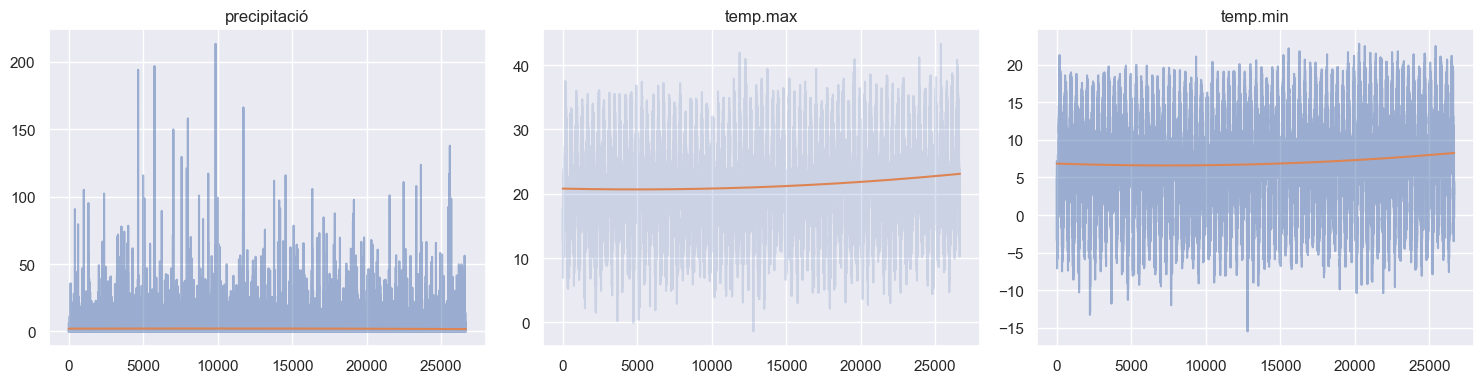

In [25]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4), sharex = True)
#
axs[0].set_title('precipitació')
axs[0].plot(X, df.PPT, alpha = 0.5)
axs[0].plot(X, ppt_regression)
axs[1].set_title('temp.max')
axs[1].plot(X, df.TX, alpha = 0.2)
axs[1].plot(X, tx_regression)
axs[2].set_title('temp.min')
axs[2].plot(X, df.TN, alpha = 0.5)
axs[2].plot(X, tn_regression)
plt.tight_layout()

- presipitació: comdenats a tenir menys presipitacions. 
- temps: pujen

### compute a regression over the yearly means

- taking the means over years usually helps visualizing the trend or making more robust predictions

- No té sentit fer-ho així (veure-ho tot). 
- Hauríem de comprimir la info (treure soroll). 
- Treure mitjanes anuals
    - Això ens permet parlar amb termes creibles. 
    - **temp, presipitació, pujaran/baixaren respecte aquest any**
- **Les dades reals estan molt allunyades del valor real** (no serveix per predir directament). 
- Perque la recta no s'ajusta a les dades (s'ajusta a la tendencia) pero no serveix per fer inferencia. 
    - Per fer la previsió del 28 de febrer, nomès ho fariem amb totes les dades. 

In [26]:
# Ho fem per la mitjana per anys:
years = pd.unique(df.ANY)
X_ = np.arange(years.shape[0]).reshape(-1, 1)

In [27]:
PPT_ = df.groupby(df.ANY).PPT.mean().to_numpy().reshape(-1, 1)
ppt_regression = pipeline.fit(X_, PPT_).predict(X_)

TX_ = df.groupby(df.ANY).TX.mean().to_numpy().reshape(-1, 1)
tx_regression = pipeline.fit(X_, TX_).predict(X_)

TN_ = df.groupby(df.ANY).TN.mean().to_numpy().reshape(-1, 1)
tn_regression = pipeline.fit(X_, TN_).predict(X_)

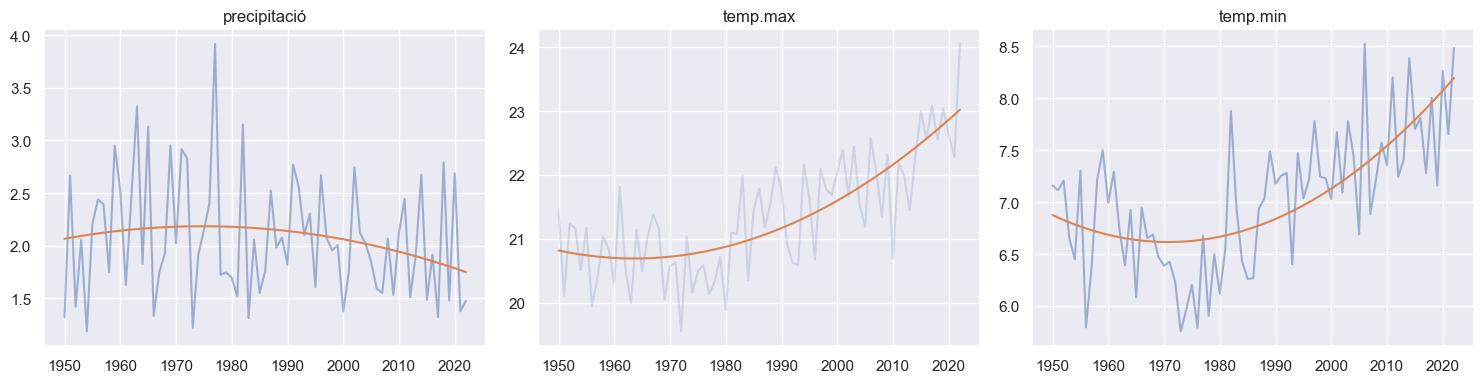

In [28]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))
#
axs[0].set_title('precipitació')
axs[0].plot(years, PPT_, alpha = 0.5)
axs[0].plot(years, ppt_regression)
axs[1].set_title('temp.max')
axs[1].plot(years, TX_, alpha = 0.2)
axs[1].plot(years, tx_regression)
axs[2].set_title('temp.min')
axs[2].plot(years, TN_, alpha = 0.5)
axs[2].plot(years, tn_regression)
plt.tight_layout()